### Online Shoppers Intention

The data used in this analysis is an Online Shoppers Purchasing Intention data set provided from a top ecommerce site. The data set was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The primary purpose of the data set is to predict the purchasing intentions of a visitor to this particular store’s website.

#### Feature Description

- Administrative: This is the number of pages of this type (administrative) that the user visited.
- Administrative_Duration: This is the amount of time spent in this category of pages.
- Informational: This is the number of pages of this type (informational) that the user visited.
- Informational_Duration: This is the amount of time spent in this category of pages.
- ProductRelated: This is the number of pages of this type (product related) that the user visited.
- ProductRelated_Duration: This is the amount of time spent in this category of pages.
- BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.
- ExitRates: The percentage of pageviews on the website that end at that specific page.
- PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.
##### More information about how this is calculated
- SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. More information about how this value is calculated below.
- Month: Contains the month the pageview occurred, in string form.
- OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.
- Browser: An integer value representing the browser that the user was using to view the page.
- Region: An integer value representing which region the user is located in.
- TrafficType: An integer value representing what type of traffic the user is categorized into.
- VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.
- Weekend: A boolean representing whether the session is on a weekend.
- Revenue: A boolean representing whether or not the user completed the purchase.


#### Import Libraries

In [197]:
#import pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import calendar
#import pyplot and seaborn for visualization
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

#### Data Inspection

In [198]:
data = pd.read_csv('online_shoppers_intention.csv', index_col=False)

In [199]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [200]:
data.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [201]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [203]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [204]:
data.shape

(12330, 18)

- The dataset consists of 12330 rows and 18 columns

In [205]:
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

#### Data Cleaning

- Checking and Replacing Missing Values
- Checking and Deleting Duplicates

In [206]:
# Check for missing values

data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

- There are no missing values in the dataset

In [207]:
# Check for duplicates

data.duplicated().sum()

125

- There are 125 duplicate values

In [208]:
# Deleting duplicates

data = data.drop_duplicates()

In [209]:
data.duplicated().sum()

0

In [210]:
data.shape

(12205, 18)

### Exploratory Data Analysis

#### Visitor Type by Month

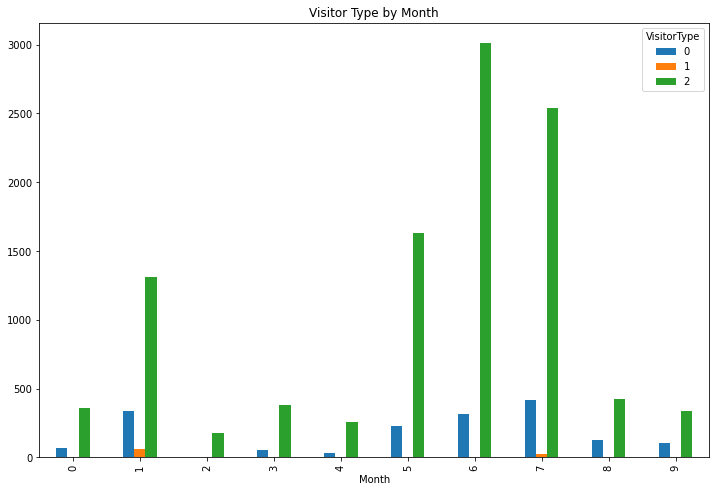

In [289]:
Visitor_Month = pd.crosstab(data.Month, data.VisitorType)

#plot the data
Visitor_Month.plot.bar(figsize=(12,8))

plt.title('Visitor Type by Month')
plt.show()

- Majority of customers that visited the store are returning visitors, with the highest occuring in February

#### Month by Revenue

In [213]:
Month_Revenue = data.groupby('Month').Revenue.sum().sort_values(ascending=False)
Month_Revenue

Month
Nov     760
May     365
Dec     216
Mar     192
Oct     115
Sep      86
Aug      76
Jul      66
June     29
Feb       3
Name: Revenue, dtype: int64

<BarContainer object of 10 artists>

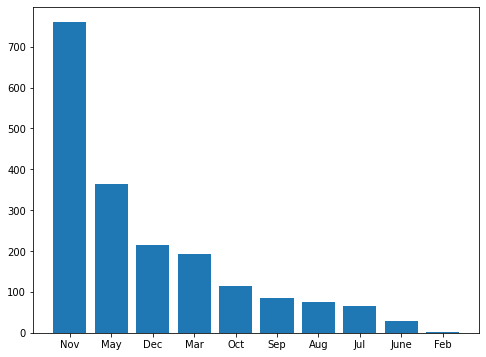

In [214]:
plt.figure(figsize=(8,6))
plt.bar(Month_Revenue.index, Month_Revenue.values)

- The highest revenue was generated in November, this could be as a result of Black Friday Sales

#### Visitor Type by Revenue

In [215]:
Visitor_Revenue = data.groupby('VisitorType').Revenue.sum().sort_values(ascending=False)
Visitor_Revenue

VisitorType
Returning_Visitor    1470
New_Visitor           422
Other                  16
Name: Revenue, dtype: int64

<BarContainer object of 3 artists>

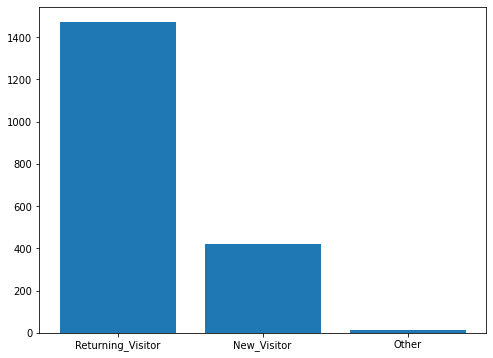

In [216]:
plt.figure(figsize=(8,6))
plt.bar(Visitor_Revenue.index, Visitor_Revenue.values)

- Returning Visitors contribute majorly to the revenue generated by the Online Store

#### Product Related Page Views by Month

In [217]:
Product_Month = data.groupby('Month').ProductRelated.sum().sort_values(ascending=False)
Product_Month 

Month
Nov     138007
May      89068
Dec      48326
Mar      37724
Oct      18428
Aug      16566
Jul      15728
Sep      14831
June     10384
Feb       2055
Name: ProductRelated, dtype: int64

<BarContainer object of 10 artists>

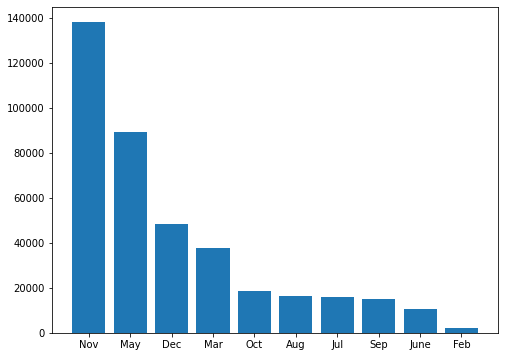

In [218]:
plt.figure(figsize=(8,6))
plt.bar(Product_Month.index, Product_Month.values)

- The Product Related page recorded the most visits in November

#### Informational Page Views by Month

In [219]:
Info_Month = data.groupby('Month').Informational.sum().sort_values(ascending=False)
Info_Month 

Month
Nov     1938
May     1426
Dec      885
Mar      802
Oct      268
Sep      254
Aug      235
Jul      223
June     162
Feb       16
Name: Informational, dtype: int64

<BarContainer object of 10 artists>

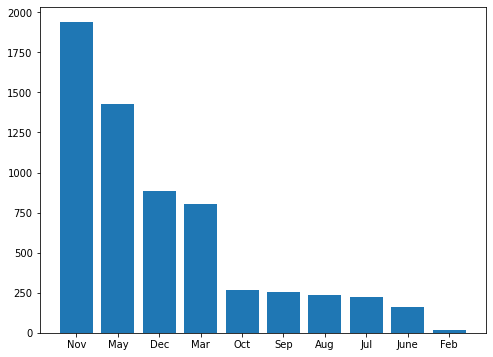

In [220]:
plt.figure(figsize=(8,6))
plt.bar(Info_Month.index, Info_Month.values)

- The Informational page recorded the most visits in November

#### Administrative Page Views by Month

In [221]:
Admin_Month = data.groupby('Month').Administrative.sum().sort_values(ascending=False)
Admin_Month

Month
Nov     7847
May     6610
Dec     3793
Mar     3600
Oct     2042
Sep     1494
Aug     1358
Jul     1047
June     655
Feb      100
Name: Administrative, dtype: int64

<BarContainer object of 10 artists>

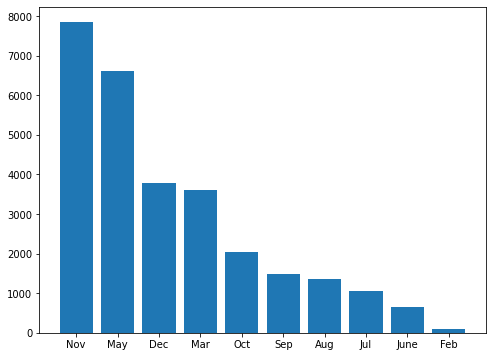

In [222]:
plt.figure(figsize=(8,6))
plt.bar(Admin_Month.index, Admin_Month.values)

- The Administrative page also recorded the most visits in November

##### Scatter Plot for Product Related and Duration

<AxesSubplot: xlabel='ProductRelated', ylabel='ProductRelated_Duration'>

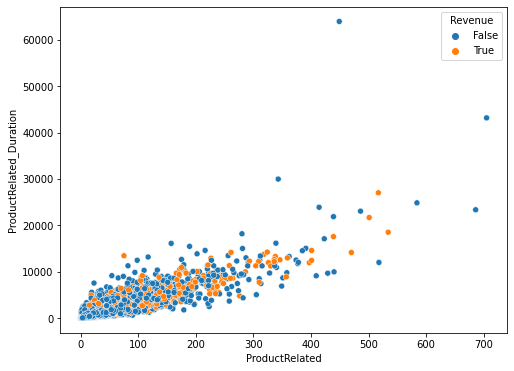

In [223]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="ProductRelated", y="ProductRelated_Duration", hue="Revenue")

- Not all customers that visited the product page actually completed the transaction, as most customers left the page without making purchase

##### Bounce Rates and Administrative Duration

<AxesSubplot: xlabel='BounceRates', ylabel='Administrative_Duration'>

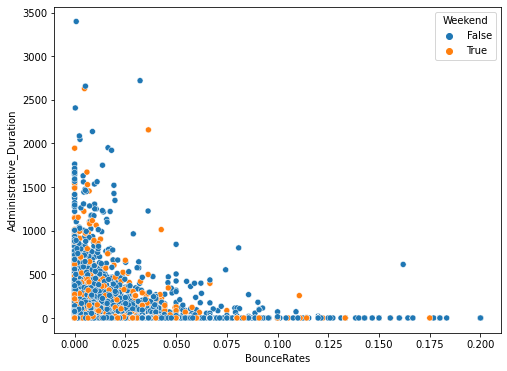

In [224]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="BounceRates", y="Administrative_Duration", hue="Weekend")

- There is a higher percentage of visitors who entered the Administrative Page and exited, without triggering any additional tasks on weekends.

##### Thus, it can be concluded that the online store recorded the highest visits to its website in November and also generated the highest sales same month; this could be as a result of the Black Friday sales, where price of products are heavily discounted. 

### Modelling

#### Data Manipulation - Categorical to Numerical

As machine learning models and preditive analysis cannot be built with data in raw form without being skewed, the label encoder will be used to convert categorical variables to numerical

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

In [226]:
#Use Label Encoder to convert categorical variables to numerical

from sklearn.preprocessing import LabelEncoder

data_sklearn = data

lb_make = LabelEncoder()
data_sklearn['Month'] = lb_make.fit_transform(data['Month'])
data_sklearn['VisitorType'] = lb_make.fit_transform(data['VisitorType'])
data_sklearn['Weekend'] = lb_make.fit_transform(data['Weekend'])
data_sklearn['Revenue'] = lb_make.fit_transform(data['Revenue'])


data_sklearn.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


#### Normalzing the Dataset

Machine learning algorithms tend to perform better or converge faster when the different features (variables) are on a smaller scale. Therefore it is common practice to normalize the data before training machine learning models on it.Normalization also makes the training process less sensitive to the scale of the features. This results in getting better coefficients after training.

In [227]:
scaler = preprocessing.MinMaxScaler()
names = data_sklearn.columns
d = scaler.fit_transform(data_sklearn)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.000000,0.000000,0.000,0.000000,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,0.222222,0.142857,0.083333,0.000,0.052632,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,0.222222,0.428571,0.000000,1.000,0.105263,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,0.222222,0.285714,0.083333,0.125,0.157895,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,0.222222,0.285714,0.166667,0.000,0.157895,1.0,1.0,0.0


#### Data Correlation

- Correlation is a statistical metric that reflects how tightly two variables are related linearly

In [228]:
scaled_df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.600457,0.375256,0.254813,0.428305,0.371146,-0.213096,-0.311255,0.097017,-0.096951,0.047651,-0.006586,-0.025622,-0.007262,-0.034643,-0.023492,0.023825,0.136330
Administrative_Duration,0.600457,1.000000,0.301419,0.237211,0.286863,0.353583,-0.136913,-0.201971,0.066228,-0.074666,0.028408,-0.007529,-0.015742,-0.006729,-0.014991,-0.022407,0.013259,0.091768
Informational,0.375256,0.301419,1.000000,0.618648,0.372572,0.386052,-0.109095,-0.159429,0.047406,-0.049350,0.019146,-0.009721,-0.038787,-0.030317,-0.035197,0.057319,0.034359,0.093626
Informational_Duration,0.254813,0.237211,0.618648,1.000000,0.279082,0.346596,-0.069878,-0.102852,0.030090,-0.031261,0.005589,-0.009734,-0.019573,-0.027891,-0.025126,0.045596,0.023193,0.069358
ProductRelated,0.428305,0.286863,0.372572,0.279082,1.000000,0.860330,-0.192884,-0.286082,0.054201,-0.025839,0.069523,0.004194,-0.013586,-0.040108,-0.044223,0.129521,0.013477,0.156042
ProductRelated_Duration,0.371146,0.353583,0.386052,0.346596,0.860330,1.000000,-0.173829,-0.245265,0.050923,-0.038122,0.060447,0.002870,-0.007724,-0.034869,-0.037390,0.121887,0.004903,0.150077
BounceRates,-0.213096,-0.136913,-0.109095,-0.069878,-0.192884,-0.173829,1.000000,0.902144,-0.115799,0.088626,-0.018898,0.026811,-0.015501,0.002787,0.089184,0.132442,-0.034808,-0.145091
ExitRates,-0.311255,-0.201971,-0.159429,-0.102852,-0.286082,-0.245265,0.902144,1.000000,-0.173627,0.117176,-0.035594,0.016345,-0.003323,-0.000987,0.087478,0.177935,-0.053061,-0.204320
PageValues,0.097017,0.066228,0.047406,0.030090,0.054201,0.050923,-0.115799,-0.173627,1.000000,-0.064481,0.021322,0.018632,0.045908,0.010588,0.012286,-0.110323,0.010801,0.491894
SpecialDay,-0.096951,-0.074666,-0.049350,-0.031261,-0.025839,-0.038122,0.088626,0.117176,-0.064481,1.000000,0.078991,0.012806,0.003528,-0.016450,0.052856,0.086615,-0.017723,-0.083601


<AxesSubplot: >

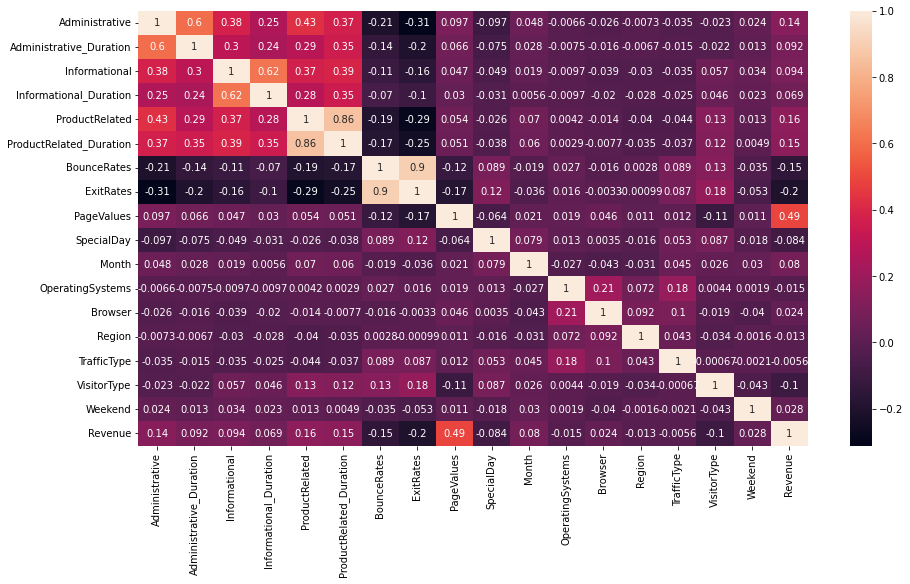

In [229]:
# Using heatmap to visualize the correlation:

plt.figure(figsize=(15,8))
sns.heatmap(scaled_df.corr(),annot=True)

- BounceRates, ExitRates, SpecialDay, OperatingSystems, Region, VisitorType and TrafficType have little correlation with Revenue, the variables will be dropped during feature selection

#### Import ML Algorithms and Initialize

- In this process, six (6) regression models are built and trained, which are Random Forest, Decision Tree Regressor, XGBoost, Linear Regression, Support Vector Regression, and Gradient Boosting Regressor. First, we define a variable to store the model algorithm, next, we fit the train set variables into the model, and finally make some predictions in the test set.

In [230]:
#import and load libraries
import sklearn

import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

#### Select Target

In [231]:
y = scaled_df.Revenue

In [232]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Revenue, dtype: float64

#### Select Features

- We are dropping BounceRates, ExitRates, SpecialDay, OperatingSystems, Region, VisitorType and TrafficType, since the variables have little correlation with Revenue

In [233]:
features = scaled_df.drop(['Revenue', 'BounceRates', 'ExitRates', 'SpecialDay',
                           'OperatingSystems', 'Region', 'VisitorType', 'TrafficType'],axis=1)
features.shape

(12205, 10)

In [234]:
X = scaled_df[features.columns]

#### Train Test Split

In [235]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

#### Random Forest Regressor

In [236]:
RF_model = RandomForestRegressor(n_estimators=400,random_state=30)

In [237]:
#fit the model on the training data
RF_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400, random_state=30)

In [238]:
#predict on test data
preds_RF = RF_model.predict(X_test)

In [239]:
mae_RF = mean_absolute_error(y_test,preds_RF)
print(mae_RF)

0.14451439195286475


In [240]:
mse_RF = mean_squared_error(y_test,preds_RF)
print(mse_RF)

0.07399447969905011


In [241]:
rmse_RF = np.sqrt(mean_squared_error(y_test,preds_RF))
print(rmse_RF)

0.2720192634705309


In [242]:
r2_RF = r2_score(y_test, preds_RF) #coefficient of determination
print(r2_RF)

0.4167618698379928


#### Linear Regression

In [243]:
LRS_model = LinearRegression()

In [244]:
LRS_model.fit(X_train, y_train)

LinearRegression()

In [245]:
preds_LRS = LRS_model.predict(X_test)

In [246]:
mae_LRS = mean_absolute_error(y_test,preds_LRS)
print(mae_LRS)

0.19788153539642372


In [247]:
mse_LRS = mean_squared_error(y_test,preds_LRS)
print(mse_LRS)

0.09257090261743814


In [248]:
rmse_LRS = np.sqrt(mean_squared_error(y_test,preds_LRS))
print(rmse_LRS)

0.3042546673716578


In [249]:
r2_LRS = r2_score(y_test, preds_LRS) #coefficient of determination
print(r2_LRS)

0.2703390797584462


#### XGBoost Regression

In [250]:
xgb_model = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 60, seed = 123, silent=True)

In [251]:
xgb_model.fit(X_train, y_train)

XGBRegressor(n_estimators=60, seed=123, silent=True)

In [252]:
preds_xgb = xgb_model.predict(X_test)

In [253]:
mae_xgb = mean_absolute_error(y_test,preds_xgb)
print(mae_xgb)

0.1460914378980676


In [254]:
mse_xgb = mean_squared_error(y_test,preds_xgb)
print(mse_xgb)

0.07028436072698098


In [255]:
rmse_xgb = np.sqrt(mean_squared_error(y_test,preds_xgb))
print(rmse_xgb)

0.2651119777131561


In [256]:
r2_xgb = r2_score(y_test, preds_xgb) #coefficient of determination
print(r2_xgb)

0.4460057115509032


#### Decision Tree Regressor

In [257]:
DT_model = DecisionTreeRegressor()

In [258]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [259]:
preds_DT = DT_model.predict(X_test)

In [260]:
mae_DT = mean_absolute_error(y_test,preds_DT)
print(mae_DT)

0.14095212088112144


In [261]:
mse_DT = mean_squared_error(y_test,preds_DT)
print(mse_DT)

0.1409141938224407


In [262]:
rmse_DT = np.sqrt(mean_squared_error(y_test,preds_DT))
print(rmse_DT)

0.3753853937254894


In [263]:
r2_DT = r2_score(y_test, preds_DT) #coefficient of determination
print(r2_DT)

-0.11071165379573622


#### Support Vector Regression

In [264]:
SVR_model = SVR()

In [265]:
SVR_model.fit(X_train, y_train)

SVR()

In [266]:
preds_SVR = SVR_model.predict(X_test)

In [267]:
mae_SVR = mean_absolute_error(y_test,preds_SVR)
print(mae_SVR)

0.18756678342026037


In [268]:
mse_SVR = mean_squared_error(y_test,preds_SVR)
print(mse_SVR)

0.08531909406573203


In [269]:
rmse_SVR = np.sqrt(mean_squared_error(y_test,preds_SVR))
print(rmse_SVR)

0.29209432391905876


In [270]:
r2_SVR = r2_score(y_test, preds_SVR) #coefficient of determination
print(r2_SVR)

0.3274991716624942


#### Gradient Boosting Regressor

In [271]:
GBR_model=GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=2,learning_rate=0.2)

In [272]:
GBR_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5)

In [273]:
preds_GBR=GBR_model.predict(X_test)

In [274]:
mae_GBR = mean_absolute_error(y_test,preds_GBR)
print(mae_GBR)

0.1460662539477889


In [275]:
mse_GBR = mean_squared_error(y_test,preds_GBR)
print(mse_GBR)

0.07622167690147141


In [276]:
rmse_GBR = np.sqrt(mean_squared_error(y_test,preds_GBR))
print(rmse_GBR)

0.2760827356092217


In [277]:
r2_GBR = r2_score(y_test, preds_GBR) #coefficient of determination
print(r2_GBR)

0.399206690895922


### Evaluation of the Models
The models are evaluated using various metrics. These are the Mean Absolute Error (mae), the Mean Squared Error (mse), the Root Mean Squared Error (rmse) and the Coefficient of Determination (r-squared).

#### Calculating Mean Absolute Error

In [278]:
mae_RF = mean_absolute_error(y_test,preds_RF)
mae_LRS = mean_absolute_error(y_test,preds_LRS)
mae_xgb = mean_absolute_error(y_test,preds_xgb)
mae_DT = mean_absolute_error(y_test,preds_DT)
mae_SVR = mean_absolute_error(y_test,preds_SVR)
mae_GBR = mean_absolute_error(y_test,preds_GBR)


print('Mean Absolute Error with Random Forest: ',mae_RF)
print('Mean Absolute Error with Linear Regression: ',mae_LRS)
print('Mean Absolute Error with XGBoost Regression: ',mae_xgb)
print('Mean Absolute Error with Decision Tree: ',mae_DT)
print('Mean Absolute Error with Support Vector Regression: ',mae_SVR)
print('Mean Absolute Error with Gradient Boosting Regressor: ',mae_GBR)

Mean Absolute Error with Random Forest:  0.14451439195286475
Mean Absolute Error with Linear Regression:  0.19788153539642372
Mean Absolute Error with XGBoost Regression:  0.1460914378980676
Mean Absolute Error with Decision Tree:  0.14095212088112144
Mean Absolute Error with Support Vector Regression:  0.18756678342026037
Mean Absolute Error with Gradient Boosting Regressor:  0.1460662539477889


#### Calculating Mean Squared Error

In [279]:
mse_RF = mean_squared_error(y_test,preds_RF)
mse_LRS = mean_squared_error(y_test,preds_LRS)
mse_xgb = mean_squared_error(y_test,preds_xgb)
mse_DT = mean_squared_error(y_test,preds_DT)
mse_SVR = mean_squared_error(y_test,preds_SVR)
mse_GBR = mean_squared_error(y_test,preds_GBR)


print('Mean Squared Error with Random Forest: ',mse_RF)
print('Mean Squared Error with Linear Regression: ',mse_LRS)
print('Mean Squared Error with XGBoost Regression: ',mse_xgb)
print('Mean Squared Error with Decision Tree: ',mse_DT)
print('Mean Squared Error with Support Vector Regression: ',mse_SVR)
print('Mean Squared Error with Gradient Boosting Regressor: ',mse_GBR)

Mean Squared Error with Random Forest:  0.07399447969905011
Mean Squared Error with Linear Regression:  0.09257090261743814
Mean Squared Error with XGBoost Regression:  0.07028436072698098
Mean Squared Error with Decision Tree:  0.1409141938224407
Mean Squared Error with Support Vector Regression:  0.08531909406573203
Mean Squared Error with Gradient Boosting Regressor:  0.07622167690147141


#### Calculating Root Mean Squared Error

In [280]:
rmse_RF = np.sqrt(mean_squared_error(y_test,preds_RF))
rmse_LRS = np.sqrt(mean_squared_error(y_test,preds_LRS))
rmse_xgb = np.sqrt(mean_squared_error(y_test,preds_xgb))
rmse_DT = np.sqrt(mean_squared_error(y_test,preds_DT))
rmse_SVR = np.sqrt(mean_squared_error(y_test,preds_SVR))
rmse_GBR = np.sqrt(mean_squared_error(y_test,preds_GBR))


print('Root Mean Squared Error with Random Forest: ',rmse_RF)
print('Root Mean Squared Error with Linear Regression: ',rmse_LRS)
print('Root Mean Squared Error with XGBoost Regression: ',rmse_xgb)
print('Root Mean Squared Error with Decision Tree: ',rmse_DT)
print('Root Mean Squared Error with Support Vector Regression: ',rmse_SVR)
print('Root Mean Squared Error with Gradient Boosting Regressor: ',rmse_GBR)

Root Mean Squared Error with Random Forest:  0.2720192634705309
Root Mean Squared Error with Linear Regression:  0.3042546673716578
Root Mean Squared Error with XGBoost Regression:  0.2651119777131561
Root Mean Squared Error with Decision Tree:  0.3753853937254894
Root Mean Squared Error with Support Vector Regression:  0.29209432391905876
Root Mean Squared Error with Gradient Boosting Regressor:  0.2760827356092217


#### Coefficient of determination

In [281]:
r2_RF = r2_score(y_test,preds_RF)
r2_RF = r2_score(y_test,preds_LRS)
r2_xgb = r2_score(y_test,preds_xgb)
r2_DT = r2_score(y_test,preds_DT)
r2_SVR = r2_score(y_test,preds_SVR)
r2_GBR = r2_score(y_test,preds_GBR)


print('Coefficient of detremination with Random Forest: ',r2_RF)
print('Coefficient of detremination with Linear Regression: ',r2_LRS)
print('Coefficient of detremination with XGBoost Regression: ',r2_xgb)
print('Coefficient of detremination with Decision Tree: ',r2_DT)
print('Coefficient of detremination with Support Vector Regression: ',r2_SVR)
print('Coefficient of detremination with Gradient Boosting Regressor: ',r2_GBR)

Coefficient of detremination with Random Forest:  0.2703390797584462
Coefficient of detremination with Linear Regression:  0.2703390797584462
Coefficient of detremination with XGBoost Regression:  0.4460057115509032
Coefficient of detremination with Decision Tree:  -0.11071165379573622
Coefficient of detremination with Support Vector Regression:  0.3274991716624942
Coefficient of detremination with Gradient Boosting Regressor:  0.399206690895922


In [288]:
ML_models = pd.DataFrame({
    'Model': ['Random Forest Regressor', 'Linear Regression', 'Decision Tree Regressor',\
              'XGBoost Regression','Support Vector Regression','Gradient Boosting Regressor'],
    'MAE': [mae_RF,mae_LRS,mae_DT,mae_xgb,mae_SVR,mae_GBR],
    'MSE': [mse_RF,mse_LRS,mse_DT,mse_xgb,mse_SVR,mse_GBR],
    'RMSE': [rmse_RF,rmse_LRS,rmse_DT,rmse_xgb,rmse_SVR,rmse_GBR],
    'COE': [r2_RF,r2_LRS,r2_DT,r2_xgb,r2_SVR,r2_GBR]})
    
Best_Model = ML_models.sort_values(by='COE', ascending=False)
Best_Model

,Model,MAE,MSE,RMSE,COE
3,XGBoost Regression,0.146091,0.070284,0.265112,0.446006
5,Gradient Boosting Regressor,0.146066,0.076222,0.276083,0.399207
4,Support Vector Regression,0.187567,0.085319,0.292094,0.327499
0,Random Forest Regressor,0.144514,0.073994,0.272019,0.270339
1,Linear Regression,0.197882,0.092571,0.304255,0.270339
2,Decision Tree Regressor,0.140952,0.140914,0.375385,-0.110712


- XGBoost Regression model surpasses all other models with the least errors and the highest R-squared value, which makes it the Best Performing Model.